# Question 1

## Part A

In [1]:
import pandas as pd

In [2]:
data = {
    "PlotID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    "Size of Plot (sq. meters)": [250, 300, 150, 400, 500, 600, 350, 450, 200, 275, 325, 550, 450, 225, 375, 175, 275, 350, 500, 600],
    "Land Price (GHS)": [25000, 28500, 15750, 36000, 45000, 52200, 32000, 40500, 19900, 27250, 30000, 50000, 41500, 20750, 34500, 17500, 26500, 33000, 46000, 53500]
}

In [3]:
land_df = pd.DataFrame(data)

In [4]:
land_df

,PlotID,Size of Plot (sq. meters),Land Price (GHS)
0,1,250,25000
1,2,300,28500
2,3,150,15750
3,4,400,36000
4,5,500,45000
5,6,600,52200
6,7,350,32000
7,8,450,40500
8,9,200,19900
9,10,275,27250


## Part B

In [5]:
import matplotlib.pyplot as plt

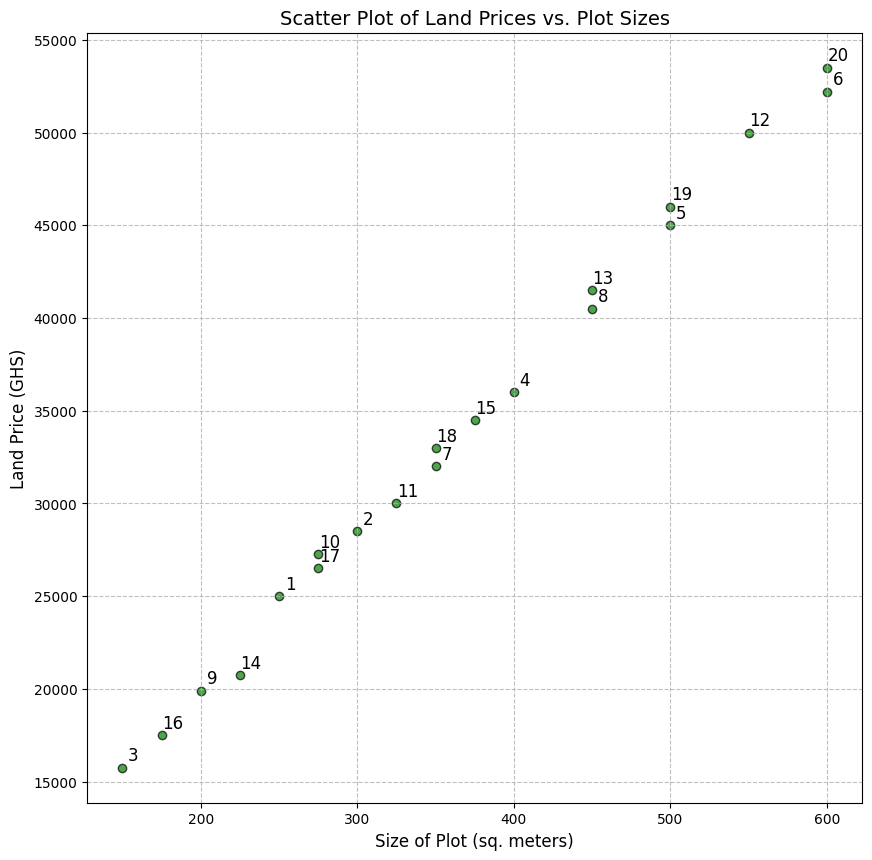

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(land_df["Size of Plot (sq. meters)"], land_df["Land Price (GHS)"], color='green', edgecolor='k', alpha=0.7)

plt.title('Scatter Plot of Land Prices vs. Plot Sizes', fontsize=14)
plt.xlabel('Size of Plot (sq. meters)', fontsize=12)
plt.ylabel('Land Price (GHS)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.8)

for i in range(len(land_df)):
    plt.annotate(
        land_df["PlotID"][i],
        (land_df["Size of Plot (sq. meters)"][i], land_df["Land Price (GHS)"][i]),
        textcoords="offset points",
        xytext=(8,5),
        ha='center',
        fontsize=12,
    )

plt.show()

# Question 2

## Part A

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

The data from the images are rewritten as dictionaries with the column header being the key, and the values in that column in a list. This is so that the `pandas.Dataframe` method can easily convert the information provided into a pandas dataframe, which makes subsequent operations easier.

In [8]:
# Data for hospital patients obtained from image
data_hospital = {
    "Patient ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Fever": [38.5, 39, 37.8, 40.2, 38, 39.5, 37.5, 38.8, 39.2, 38.3],
    "Headache": ["Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "No"],
    "Muscle Pain": ["Yes", "Yes", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "No"],
    "Nausea": ["Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "No"],
    "Rash": ["No", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No"],
    "Diarrhea": ["No", "Yes", "No", "No", "Yes", "No", "No", "No", "Yes", "Yes"],
    "Disease (Target)": ["Malaria", "Typhoid", "Malaria", "Typhoid", "Typhoid", "Typhoid", "Malaria", "Malaria", "Typhoid", "Typhoid"]
}

In [9]:
# Data for store customers obtained from image
data_store = {
    "Customer ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [25, 45, 35, 50, 30, 40, 28, 55, 32, 42],
    "Income ($1000s)": [40, 80, 60, 100, 45, 70, 50, 90, 55, 75],
    "Education Level": ["Bachelor's", "Master's", "PhD", "Bachelor's", "High School", "Master's", "Bachelor's", "PhD", "High School", "Master's"],
    "Previous Purchases": [2, 10, 5, 8, 1, 6, 3, 12, 4, 7],
    "Marital Status": ["Single", "Married", "Single", "Married", "Divorced", "Married", "Single", "Widowed", "Married", "Single"],
    "Buy Product (Target)": ["No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes"]
}

In [10]:
# both datases are transformed into pandas dataframes

df_hospital = pd.DataFrame(data_hospital)
df_store = pd.DataFrame(data_store)

In [11]:
# viewing the first 5 rows of the hospital dataset to 
# confirm the transformation and also that the values are consistent with the image
df_hospital.head()

,Patient ID,Fever,Headache,Muscle Pain,Nausea,Rash,Diarrhea,Disease (Target)
0,1,38.5,Yes,Yes,Yes,No,No,Malaria
1,2,39.0,Yes,Yes,No,No,Yes,Typhoid
2,3,37.8,No,Yes,No,No,No,Malaria
3,4,40.2,Yes,Yes,Yes,Yes,No,Typhoid
4,5,38.0,No,No,Yes,No,Yes,Typhoid


In [12]:
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient ID        10 non-null     int64  
 1   Fever             10 non-null     float64
 2   Headache          10 non-null     object 
 3   Muscle Pain       10 non-null     object 
 4   Nausea            10 non-null     object 
 5   Rash              10 non-null     object 
 6   Diarrhea          10 non-null     object 
 7   Disease (Target)  10 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 772.0+ bytes


In [13]:
df_store.head()

,Customer ID,Age,Income ($1000s),Education Level,Previous Purchases,Marital Status,Buy Product (Target)
0,1,25,40,Bachelor's,2,Single,No
1,2,45,80,Master's,10,Married,Yes
2,3,35,60,PhD,5,Single,No
3,4,50,100,Bachelor's,8,Married,Yes
4,5,30,45,High School,1,Divorced,No


In [14]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           10 non-null     int64 
 1   Age                   10 non-null     int64 
 2   Income ($1000s)       10 non-null     int64 
 3   Education Level       10 non-null     object
 4   Previous Purchases    10 non-null     int64 
 5   Marital Status        10 non-null     object
 6   Buy Product (Target)  10 non-null     object
dtypes: int64(4), object(3)
memory usage: 692.0+ bytes


In [15]:
def encode_categorical_columns(df):
    """
    Encodes categorical columns in a pandas dataFrame.
    It selects categorical columns, identified by their 'object' datatype,
    and encodes them using Label Encoding.

    Parameters:
    df (pandas.DataFrame): The input dataFrame.

    Returns:
    pandas.DataFrame: The dataFrame with categorical columns encoded.
    """


    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])
    return df

In [16]:
# encoding the categorical columns in the hospital and store datasets

df_hospital = encode_categorical_columns(df_hospital)
df_store = encode_categorical_columns(df_store)

In [17]:
# viewing the first 5 rows of the hospital dataset to confirm the encoding was successful

df_hospital.head()

,Patient ID,Fever,Headache,Muscle Pain,Nausea,Rash,Diarrhea,Disease (Target)
0,1,38.5,1,1,1,0,0,0
1,2,39.0,1,1,0,0,1,1
2,3,37.8,0,1,0,0,0,0
3,4,40.2,1,1,1,1,0,1
4,5,38.0,0,0,1,0,1,1


In [18]:
# viewing the information of the hospital dataset to confirm the encoding was successful
# had it not been successful, the columns would have been of 'object' datatype
# but now they are of 'int64' or 'float64' datatype
df_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient ID        10 non-null     int64  
 1   Fever             10 non-null     float64
 2   Headache          10 non-null     int32  
 3   Muscle Pain       10 non-null     int32  
 4   Nausea            10 non-null     int32  
 5   Rash              10 non-null     int32  
 6   Diarrhea          10 non-null     int32  
 7   Disease (Target)  10 non-null     int32  
dtypes: float64(1), int32(6), int64(1)
memory usage: 532.0 bytes


In [19]:
df_store.head()

,Customer ID,Age,Income ($1000s),Education Level,Previous Purchases,Marital Status,Buy Product (Target)
0,1,25,40,0,2,2,0
1,2,45,80,2,10,1,1
2,3,35,60,3,5,2,0
3,4,50,100,0,8,1,1
4,5,30,45,1,1,0,0


In [20]:
# Separate features and target variables for the hospital dataset. 
# The target variable is the 'Disease (Target)' column.
# The features are all the other columns except the 'Patient ID' column 
# which has no relevance to whether the patient has malaria or typhoid.
# This is ibecause it is just an identifier for the patient.

X_hospital = df_hospital.drop(columns=["Patient ID", "Disease (Target)"])
y_hospital = df_hospital["Disease (Target)"]

In [21]:
# Separate features and target variables for the store dataset. 
# The target variable is the 'Buy Product (Target)' column.
# The features are all the other columns except the 'Customer ID' column
# which has no relevance to whether the customer will buy a product or not.
# This is because it is just an identifier for the customer.

X_store = df_store.drop(columns=["Customer ID", "Buy Product (Target)"])
y_store = df_store["Buy Product (Target)"]

A Random Forest classifier is trained on each dataset to learn the relationships between the features and the target variable. Based on the learned relationships, I extract feature importance from the trained models to identify the most significant features.

In [22]:
rf_hospital = RandomForestClassifier(n_estimators=100, random_state=42)
rf_hospital.fit(X_hospital, y_hospital)

rf_store = RandomForestClassifier(n_estimators=100, random_state=42)
rf_store.fit(X_store, y_store)

RandomForestClassifier(random_state=42)

Feature importance is a measure of how much a feature contributes to the prediction of the target variable. It is calculated by the Random Forest algorithm based on the decrease in impurity that a feature causes when it is used to split the data. The more a feature decreases impurity, the more important it is.

In [23]:
importances_hospital = rf_hospital.feature_importances_
importances_store = rf_store.feature_importances_

importances_hospital = rf_hospital.feature_importances_
importances_store = rf_store.feature_importances_

features_hospital = X_hospital.columns
features_store = X_store.columns

importances_hospital_df = pd.DataFrame(importances_hospital, index=features_hospital, columns=['Importance']).sort_values(by='Importance', ascending=False)
importances_store_df = pd.DataFrame(importances_store, index=features_store, columns=['Importance']).sort_values(by='Importance', ascending=False)

PCA is used to reduce the dimensionality of the features to 2 components for visualisation purposes. This helps in creating 2D classification plots that are easier to interpret.

In [24]:
pca_hospital = PCA(n_components=2)
X_hospital_pca = pca_hospital.fit_transform(X_hospital)

pca_store = PCA(n_components=2)
X_store_pca = pca_store.fit_transform(X_store)

The Random Forest classifiers created are then trained on the reduced dataset, and the decision boundaries are plotted. The decision boundaries are plotted to show the regions where the classifier predicts the target variable to be 0 or 1 (label-encoded values of the target variable).

A decision boundary is a line that separates the regions where the classifier predicts the target variable to be 0 or 1. The decision boundary is created by the classifier based on the learned relationships between the features and the target variable.

In [25]:
rf_hospital_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_hospital_pca.fit(X_hospital_pca, y_hospital)

rf_store_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_store_pca.fit(X_store_pca, y_store)

RandomForestClassifier(random_state=42)

In [26]:
def create_meshgrid(X, h=0.02):
    """
    Creates a meshgrid for plotting decision boundaries.

    Parameters:
    X (numpy.ndarray): The input data.
    h (float): The step size in the meshgrid. Default is 0.02.

    Returns:
    numpy.ndarray: The meshgrid.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [27]:
# creating meshgrids for the hospital and store datasets

xx_hospital, yy_hospital = create_meshgrid(X_hospital_pca)
xx_store, yy_store = create_meshgrid(X_store_pca)

Predicting the target variable for each meshgrid point in the hospital and store datasets.
This is done by first flattening the meshgrid points into a 2D array, then predicting the target variable for each point. The predicted target variable is then reshaped to the original meshgrid shape.

In [28]:
Z_hospital = rf_hospital_pca.predict(np.c_[xx_hospital.ravel(), yy_hospital.ravel()])
Z_hospital = Z_hospital.reshape(xx_hospital.shape)

Z_store = rf_store_pca.predict(np.c_[xx_store.ravel(), yy_store.ravel()])
Z_store = Z_store.reshape(xx_store.shape)

Classification plots are created to show the decision boundaries and the predicted target variable for each meshgrid point. The classification plots help in visualising how the classifier predicts the target variable based on the learned relationships between the features and the target variable.

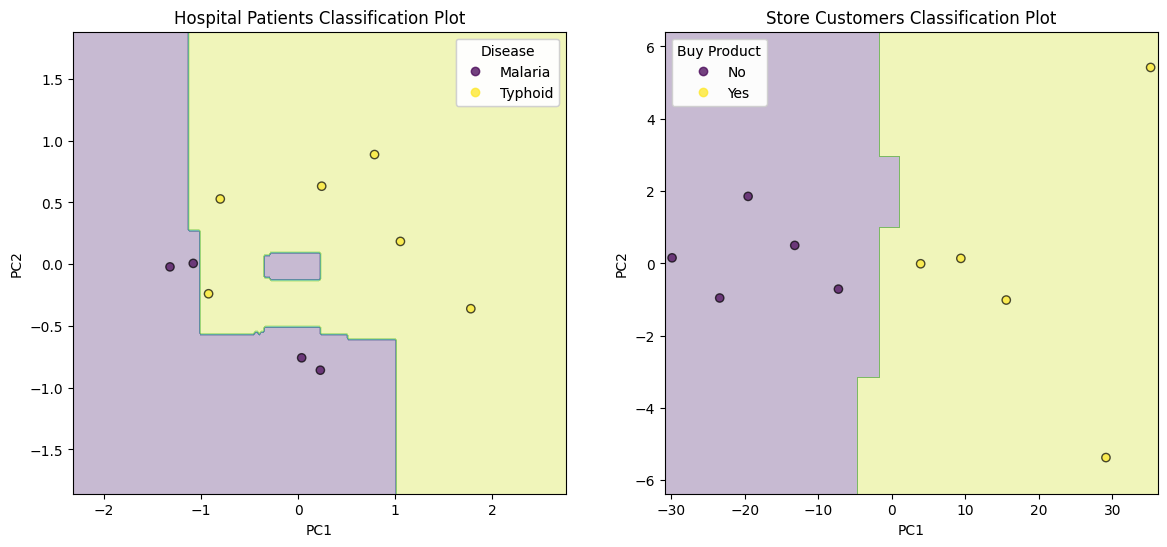

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hospital patients classification plot
axes[0].contourf(xx_hospital, yy_hospital, Z_hospital, alpha=0.3, cmap='viridis')
scatter_hospital = axes[0].scatter(X_hospital_pca[:, 0], X_hospital_pca[:, 1], c=y_hospital, cmap='viridis', edgecolor='k', alpha=0.7)
axes[0].set_title('Hospital Patients Classification Plot')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
#Malaira is represented by 0 and Typhoid is represented by 1
class_names_hospital = {0: 'Malaria', 1: 'Typhoid'}
handles_hospital, labels_hospital = scatter_hospital.legend_elements()
labels_hospital = [class_names_hospital[int(label.strip('$\\mathdefault{}'))] for label in labels_hospital]
legend1 = axes[0].legend(handles_hospital, labels_hospital, title="Disease")
axes[0].add_artist(legend1)

# Store customers classification plot
axes[1].contourf(xx_store, yy_store, Z_store, alpha=0.3, cmap='viridis')
scatter_store = axes[1].scatter(X_store_pca[:, 0], X_store_pca[:, 1], c=y_store, cmap='viridis', edgecolor='k', alpha=0.7)
axes[1].set_title('Store Customers Classification Plot')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
class_names_store = {0: 'No', 1: 'Yes'}
handles_store, labels_store = scatter_store.legend_elements()
labels_store = [class_names_store[int(label.strip('$\\mathdefault{}'))] for label in labels_store]
legend2 = axes[1].legend(handles_store, labels_store, title="Buy Product")
axes[1].add_artist(legend2)


plt.show()

Feature importance plots are created to show the most significant features based on the Random Forest classifier. The feature importance plots help in identifying the features that contribute the most to the prediction of the target variable.

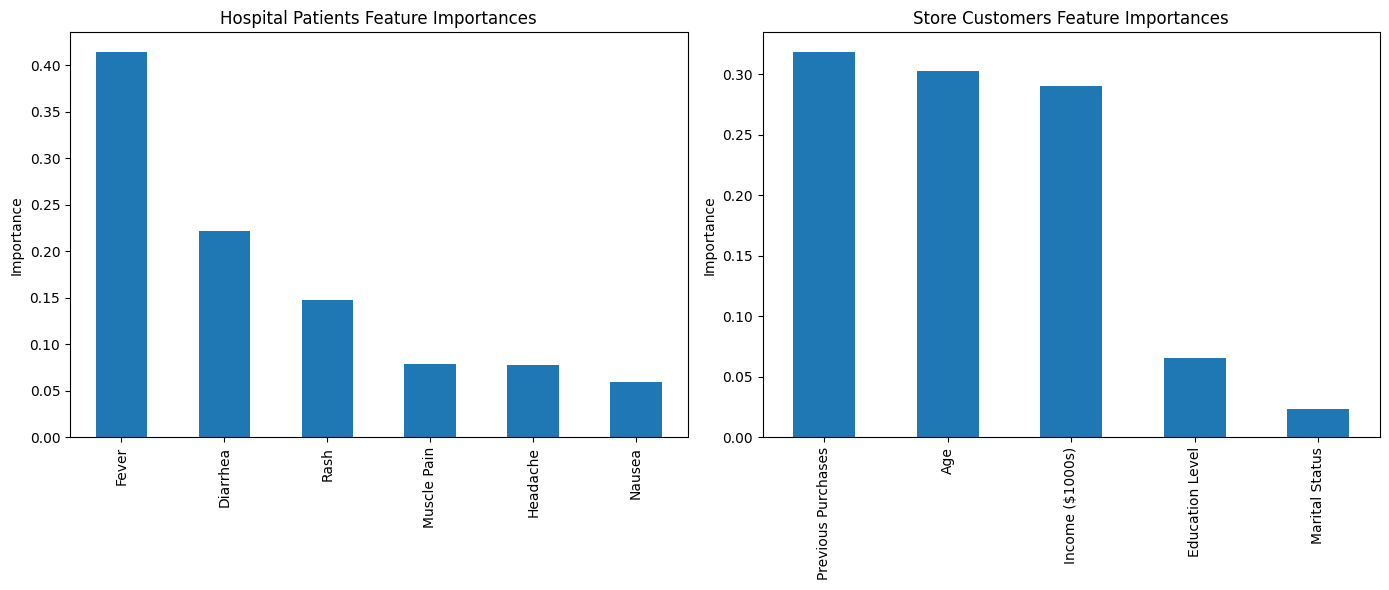

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hospital patients feature importance plot
importances_hospital_df.plot(kind='bar', ax=axes[0], legend=False)
axes[0].set_title('Hospital Patients Feature Importances')
axes[0].set_ylabel('Importance')

# Store customers feature importance plot
importances_store_df.plot(kind='bar', ax=axes[1], legend=False)
axes[1].set_title('Store Customers Feature Importances')
axes[1].set_ylabel('Importance')

plt.tight_layout()
plt.show()

## Part B

In [31]:
print(importances_hospital_df)

             Importance
Fever          0.414857
Diarrhea       0.221829
Rash           0.147390
Muscle Pain    0.078890
Headache       0.077787
Nausea         0.059247


Based on the feature importance plots, the most significant features for predicting whether a patient has malaria or typhoid are:

Feature | Importance
--- | ---
Fever | 0.4149
Diarrhea | 0.2218
Rash | 0.1474

The last 3 features are ignored because they have very low importance values compared to the top 3 features. The next two highest importance features are `Muscle Pain` and `Headache`, with importance values of `0.078890` and `0.077787`, respectively. Combined, these two features contribute almost as much as the third most important feature, `Rash`. Therefore, it is reasonable to consider these two features as insignificant for predicting whether a patient has malaria or typhoid. The last feature, `Nausea`, has an importance value of `0.059247`, which is significantly lower than even the fifth most important feature, `Headache`. Therefore, it is reasonable to consider this feature as insignificant for predicting whether a patient has malaria or typhoid.

Intuitively, the features discarded as insignificant as they are observed in occurrences of both diseases, and hence do not provide much information to distinguish between the two diseases, which would explain their low importance values as they contribute very little to a classifier's decision-making process.

In [32]:
print(importances_store_df)

                    Importance
Previous Purchases    0.318681
Age                   0.302520
Income ($1000s)       0.290139
Education Level       0.065030
Marital Status        0.023631


Based on the feature importance plots, the most significant features for predicting whether a customer will buy a product from a store are:

Feature | Importance
--- | ---
Previous Purchase | 0.3187
Age | 0.3025
Income | 0.2901

The last 2 features are `Education Level` and `Marital Status` with importance values of `0.065030` and `0.023631`, respectively. Combined, these two features contribute significantly less than the third most important feature, `Income`. Therefore, it is reasonable to consider these two features as insignificant for predicting whether a customer will buy a product from a store.

Intuitively, the most important features are related to the customer's purchasing behaviour, such as `Previous Purchase`, `Age`, and `Income`. If a person has purchased a product before, they are more likely to buy another product from the same location if they are satisfied with the previous purchase. Depending on what the shop sells, the age of the customer can also be a significant factor in determining whether they will buy a product. Similarly, the income of the customer can also be a significant factor in determining whether they will buy a product, as people with higher incomes are more likely to spend money on products.

## Part C

- Using all features ensures that no potentially useful information is discarded, which can be particularly beneficial if all features contribute significantly to the classification task. Additionally, by including all features, we avoid the risk of losing important information that might be critical for accurate classification.

- However, there are several downsides to using all features. Including irrelevant or redundant features can lead to overfitting, where the model performs well on training data but poorly on unseen data. This is because the model may learn noise and spurious patterns. More features also increase the complexity of the model, making it harder to interpret and understand. This can lead to longer training times and higher computational costs. Furthermore, high-dimensional data can lead to the curse of dimensionality, where the distance between data points becomes less meaningful, and the model's performance may degrade.

- On the other hand, using only the most significant features has several advantages. By selecting only the most significant features, we reduce the risk of overfitting. The model focuses on the most relevant information, leading to better generalization on unseen data. A model with fewer features is easier to interpret and understand, which is particularly important in domains where explainability is crucial, such as healthcare and finance. Fewer features also mean reduced computational requirements, leading to faster training and prediction times. This is beneficial for large datasets and real-time applications.

- However, there are also some downsides to using only a subset of features. By excluding some features, we risk losing potentially useful information that could improve the model's performance. This is particularly problematic if the feature selection process is not robust. Additionally, the process of selecting significant features can introduce bias if not done carefully. It is essential to use appropriate feature selection techniques to ensure that the most relevant features are chosen.

- In the context of the two classification problems looked at in this task, using only the most significant features could be beneficial if the goal is to build simpler, more interpretable models that generalize well to unseen data. However, if all features contribute significantly to the classification task, using all features might be more appropriate to capture the full complexity of the data.

- All the features did not consider significantly, however. For example, in the hospital dataset, the feature importances observed were:

Feature | Importance
--- | ---
Fever |0.414857
Diarrhea|0.221829
Rash|0.147390
Muscle Pain|0.078890
Headache|0.077787
Nausea|0.059247

And in the store dataset,
Feature | Importance
--- | ---
Previous Purchases|0.318681
Age|0.302520
Income ($1000s)|0.290139
Education Level|0.065030
Marital Status|0.023631

In this situation, it would be beneficial to use only the most significant features for the classification task, as the less significant features contribute very little to the model's decision-making process. By using only the most significant features, we can build simpler, more interpretable models that generalize well to unseen data.